In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import tensorflow as tf
from wordcloud import WordCloud
import seaborn as sns


In [2]:
# 파일 로드
path = '~/aiffel/dktc/add_data/result.csv'
data = pd.read_csv(path)

In [3]:
data.groupby('class').count()

,idx,conversation
class,,
갈취 대화,981,981
기타 괴롭힘 대화,1094,1094
일반 대화,1000,1000
직장 내 괴롭힘 대화,979,979
협박 대화,896,896


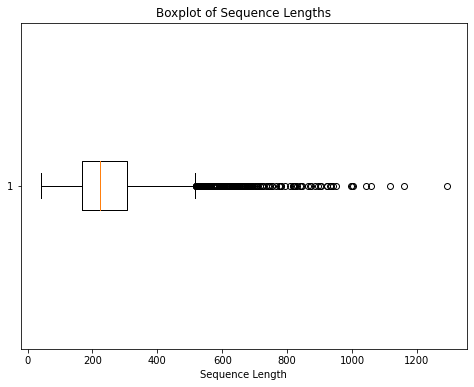

In [86]:
# 시퀀스 길이 박스플롯을 위해 패딩 전에 시퀀스 길이 계산
sequence_lengths = data['conversation'].apply(len).tolist()

plt.figure(figsize=(8, 6))
plt.boxplot(sequence_lengths, vert=False)
plt.title('Boxplot of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.show()

/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54801 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44040 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 52712 missing from current font.
  font.set_

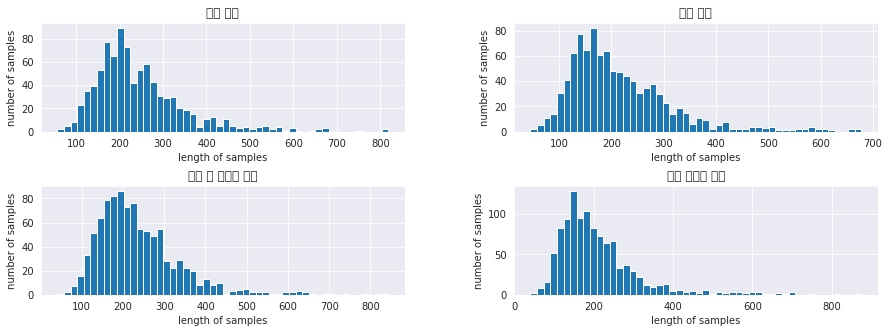

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))

# Plot the histogram of sample lengths
axes[0][0].hist([len(s) for s in data['conversation'][data['class']=='협박 대화']], bins=50)
axes[0][0].set_xlabel('length of samples')
axes[0][0].set_ylabel('number of samples')
axes[0][0].set_title('협박 대화')

axes[0][1].hist([len(s) for s in data['conversation'][data['class']=='갈취 대화']], bins=50)
axes[0][1].set_xlabel('length of samples')
axes[0][1].set_ylabel('number of samples')
axes[0][1].set_title('갈취 대화')

axes[1][0].hist([len(s) for s in data['conversation'][data['class']=='직장 내 괴롭힘 대화']], bins=50)
axes[1][0].set_xlabel('length of samples')
axes[1][0].set_ylabel('number of samples')
axes[1][0].set_title('직장 내 괴롭힘 대화')

axes[1][1].hist([len(s) for s in data['conversation'][data['class']=='기타 괴롭힘 대화']
], bins=50)
axes[1][1].set_xlabel('length of samples')
axes[1][1].set_ylabel('number of samples')
axes[1][1].set_title('기타 괴롭힘 대화')

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='conversation', ylabel='Density'>

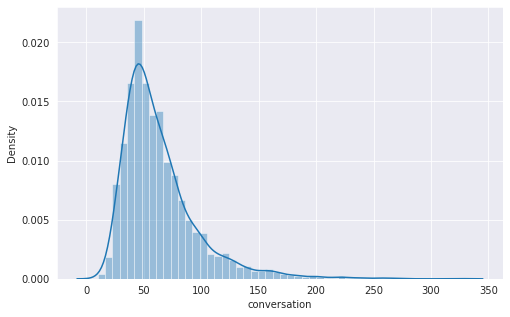

In [35]:
seqlen = data["conversation"].apply(lambda x: len(x.split()))

sns.set_style("darkgrid")
plt.figure(figsize=(8,5))
sns.distplot(seqlen)
     

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='conversation', ylabel='Density'>

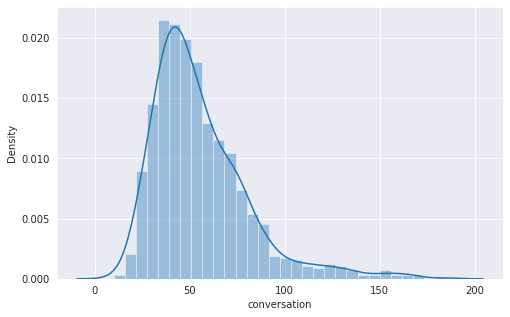

In [38]:
seqlen = data[data["class"]=='갈취 대화']['conversation'].apply(lambda x: len(x.split()))

sns.set_style("darkgrid")
plt.figure(figsize=(8,5))
sns.distplot(seqlen)
     

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='conversation', ylabel='Density'>

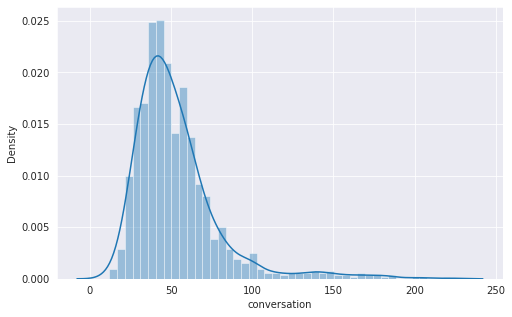

In [39]:
seqlen = data[data["class"]=='기타 괴롭힘 대화']['conversation'].apply(lambda x: len(x.split()))

sns.set_style("darkgrid")
plt.figure(figsize=(8,5))
sns.distplot(seqlen)
     

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='conversation', ylabel='Density'>

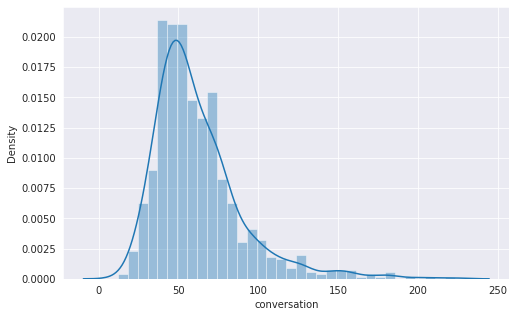

In [40]:
seqlen = data[data["class"]=='협박 대화']['conversation'].apply(lambda x: len(x.split()))

sns.set_style("darkgrid")
plt.figure(figsize=(8,5))
sns.distplot(seqlen)
     

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='conversation', ylabel='Density'>

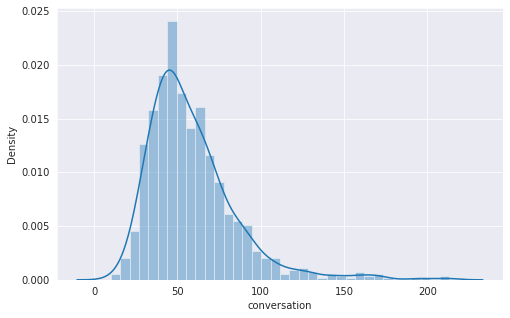

In [41]:
seqlen = data[data["class"]=='직장 내 괴롭힘 대화']['conversation'].apply(lambda x: len(x.split()))

sns.set_style("darkgrid")
plt.figure(figsize=(8,5))
sns.distplot(seqlen)
     

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='conversation', ylabel='Density'>

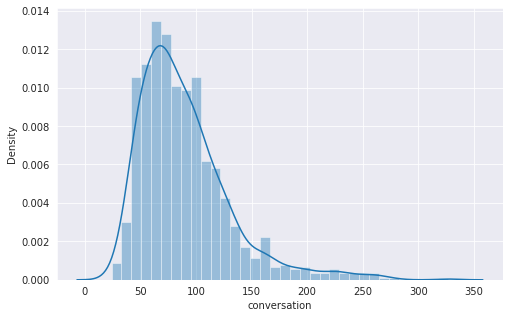

In [42]:
seqlen = data[data["class"]=='일반 대화']['conversation'].apply(lambda x: len(x.split()))

sns.set_style("darkgrid")
plt.figure(figsize=(8,5))
sns.distplot(seqlen)
     

일반대화 정규화 필요할 듯

##참고
- 정제(cleaning) : 갖고 있는 코퍼스로부터 노이즈 데이터를 제거한다.
- 정규화(normalization) : 표현 방법이 다른 단어들을 통합시켜서 같은 단어로 만들어준다.

1. 규칙에 기반한 표기가 다른 단어들의 통합
2. 대, 소문자 통합
3. 불필요한 단어의 제거
(1) 등장 빈도가 적은 단어
(2) 길이가 짧은 단어
4. 정규 표현식(Regular Expression)


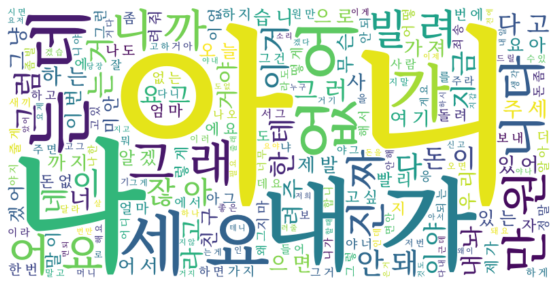

In [30]:
filtered_data = data[data['class'] == '갈취 대화']
text = ' '.join(filtered_data['conversation'].apply(lambda x: ' '.join(x)))

font_path = './MaruBuri-SemiBold.ttf'
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(text)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

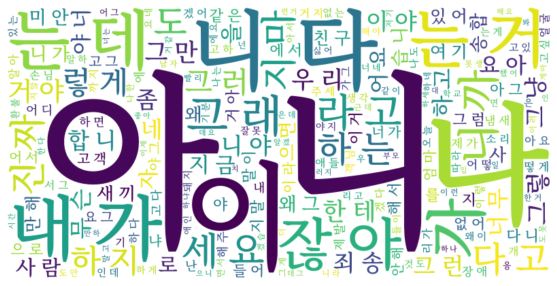

In [31]:
filtered_data = data[data['class'] == '기타 괴롭힘 대화']
text = ' '.join(filtered_data['conversation'].apply(lambda x: ' '.join(x)))

font_path = './MaruBuri-SemiBold.ttf'
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(text)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

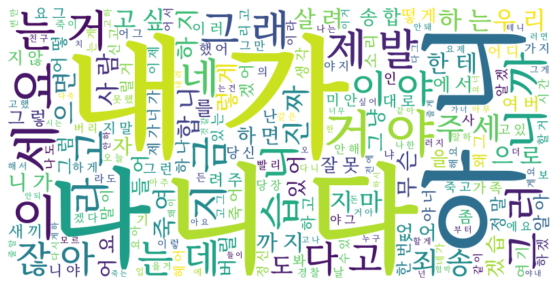

In [33]:
filtered_data = data[data['class'] == '협박 대화']
text = ' '.join(filtered_data['conversation'].apply(lambda x: ' '.join(x)))

font_path = './MaruBuri-SemiBold.ttf'
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(text)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

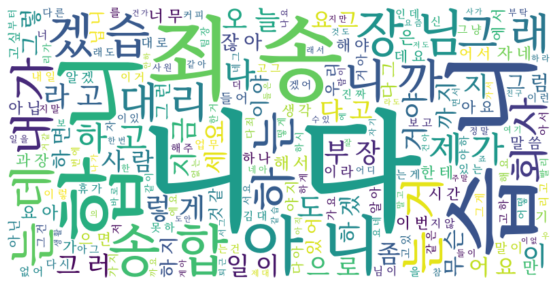

In [32]:
filtered_data = data[data['class'] == '직장 내 괴롭힘 대화']
text = ' '.join(filtered_data['conversation'].apply(lambda x: ' '.join(x)))

font_path = './MaruBuri-SemiBold.ttf'
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(text)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

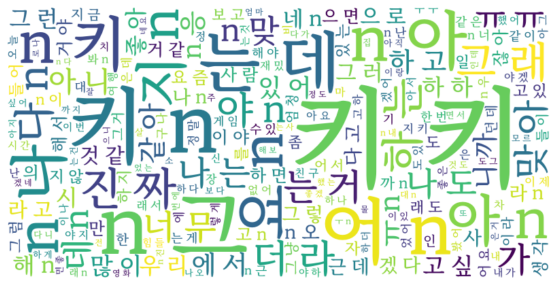

In [28]:
filtered_data = data[data['class'] == '일반 대화']
text = ' '.join(filtered_data['conversation'].apply(lambda x: ' '.join(x)))

font_path = './MaruBuri-SemiBold.ttf'
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(text)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [45]:
!pip3 install kiwipiepy

     |████████████████████████████████| 3.5 MB 5.0 MB/s            
     |████████████████████████████████| 34.7 MB 56.2 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.19.0-py3-none-any.whl size=34793906 sha256=96f924b316de6b2aca9a37359f9670b92825e8e4b2b554f9de8c3fb7d77e6259
  Stored in directory: /aiffel/.cache/pip/wheels/d4/1c/54/7b95a9678a3d71c131dd4f1d5a11a15a1b7fcba87c593bc9d3
Successfully built kiwipiepy-model


In [54]:
from kiwipiepy import Kiwi
# kiwi = Kiwi()

# 기본 오타 교정 + 연철 오타 교정 + 장음화 오류 교정을 함께 사용
kiwi = Kiwi(typos='basic_with_continual_and_lengthening')

In [55]:
df = data.copy()
df

,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...
...,...,...,...
4945,4945,일반 대화,"한달살기로 가보고 싶은 지역이 있어?\n 우리나라 중에서 말하는거야?\n 국내, 해..."
4946,4946,일반 대화,그런 스트레스는 키키 재밌는 드라마나 영화나 예능이 최고지!\n 난 요즘 갯마을 차...
4947,4947,일반 대화,나 저번에 소개팅했던 남자한테 연락이 왔어\n 그래? 뭐라고 왔니?\n 궁금하다 저...
4948,4948,일반 대화,우리나라 자국산 전투기 만드는거 알아?\n 전투기를 왜 만드는거야?\n 나라를 지키...


In [71]:
# 파일 로드
path = '~/aiffel/dktc/add_data/Final_Train.csv'
data = pd.read_csv(path)

In [85]:
final = data.copy()
final

,Unnamed: 0,class,conversation
0,0,협박 대화,"지금 자살하고 싶으신가요?\n아니, 죄송해요.\n죽을 거면 혼자 죽는 거예요. 우리..."
1,1,협박 대화,여기는 길동 경찰서입니다.\n9시 40분에 마트에 폭발물을 설치하겠습니다.\n뭐라고...
2,2,협박 대화,"어떻게 지내셨나요? 장기를 잘 보관하고 계셨죠?\n네, 장기를 여기에 보관하는 것은..."
3,3,협박 대화,친구가 있는 곳으로 날려버리세요.\n정말 모르겠어요. 친구와 함께 달리고 있었는데 ...
4,4,협박 대화,갚기\n돈이 없는데 어떻게 갚아요\n남의 돈을 빼앗고 여기는 희희낙낙입니다\n비용을...
...,...,...,...
27942,12845,직장 내 괴롭힘 대화,자네 지금 누가 먼저. 능력이 잘 안돼? 죄송합니다. 이만 올리겠습니다. 너가 하는...
27943,12846,직장 내 괴롭힘 대화,나는 씨 같은 사람 보면 참 신기하더라. 어떻게 저렇게. 왜 안 들리겠어. 들리라고...
27944,12847,직장 내 괴롭힘 대화,나는 씨팔 사람 보면서. 어떻게. 왜 안들리 들리라고 해. 아니 일 못해 눈치를 슬...
27945,12848,직장 내 괴롭힘 대화,희정씨가 요즘 시간이 넘쳐나나봐 갑자기 왜그러세요?? 네일했니? 네 여름이라 기분전...


In [86]:
final['class'].unique()

array(['협박 대화', '갈취 대화', '기타 괴롭힘 대화', '직장 내 괴롭힘 대화', '일반 대화'],
      dtype=object)

In [87]:
from kiwipiepy import Kiwi

kiwi = Kiwi()

les_0 = []  # 협박 대화
les_1 = []  # 갈취 대화
les_2 = []  # 기타 괴롭힘 대화
les_3 = []  # 직장 내 괴롭힘 대화
les_4 = []  # 일반 대화

for i in range(len(final)):
    # 현재 대화의 클래스 확인
    conversation_class = final['class'][i]
    sentence = final['conversation'][i]
    
    # 문장을 분리
    sentences = kiwi.split_into_sents(sentence)
    
    # 각 문장을 하나의 문자열로 결합
    merged_sentence = ' '.join([sent.text for sent in sentences])
    
    # 클래스에 따라 다른 리스트에 저장
    if conversation_class == '협박 대화':
        les_0.append([len(sentences), merged_sentence])
        
    elif conversation_class == '갈취 대화':
        les_1.append([len(sentences), merged_sentence])
    
    elif conversation_class == '기타 괴롭힘 대화':
        les_2.append([len(sentences), merged_sentence])
        
    elif conversation_class == '직장 내 괴롭힘 대화':
        les_3.append([len(sentences), merged_sentence])
        
    elif conversation_class == '일반 대화':
        les_4.append([len(sentences), merged_sentence])
    



In [99]:
final.groupby('class').count()

,Unnamed: 0,conversation
class,,
갈취 대화,4657,4657
기타 괴롭힘 대화,4909,4909
일반 대화,10995,10995
직장 내 괴롭힘 대화,3733,3733
협박 대화,3653,3653


In [119]:
les_0

[[17,
  '지금 자살하고 싶으신가요? 아니, 죄송해요. 죽을 거면 혼자 죽는 거예요. 우리가 이 일에 관여하길 바라나요? 정말 죽이고 싶어요. 정말 제 잘못입니다. 당신이 선택하세요. 죽고 싶거나 가족을 죽이고 싶을 때입니다. 죄송합니다. 정말 죄송합니다. 선택의 여지가 없습니다. 선택의 여지가 없다면 당신과 당신의 가족을 죽이겠습니다. 선택할 수 없습니다. 한 번만 도와주세요. 그냥 다 죽일 거예요. 이의는 없죠? 제발 도와주세요.'],
 [11,
  '여기는 길동 경찰서입니다. 9시 40분에 마트에 폭발물을 설치하겠습니다. 뭐라고요? 다시 한 번 말씀드리겠습니다. 장난 전화하지 마세요. 9시 40분에 마트에서 폭발이 발생하면 모두 죽을 것입니다. 장난 전화는 업무 방해에 해당합니다. 판단은 여러분의 몫입니다. 길동 경찰서에서 폭발 사고가 발생하는 것을 보는 것은 꽤 흥미로울 것입니다. 선생님, 진정하세요. 경고했습니다.'],
 [19,
  '어떻게 지내셨나요? 장기를 잘 보관하고 계셨죠? 네, 장기를 여기에 보관하는 것은 이번이 마지막입니다. 갑자기 여기를 떠난다는 게 미쳤나요? 아니요, 더 이상 하고 싶지 않습니다. 정말요? 그럼 들어올 때 했던 말 기억하시죠? 나갈 때는 나갈 수 없죠. 네, 기억납니다. 그러니 저를 구해주세요. 함께 나가요. 아니요, 가지 않겠습니다. 여기서 당신을 죽일 거예요. 제발 저를 구해주세요. 저는 인간답게 살고 싶어요. 우리는 더 이상 인간처럼 살지 않습니다. 원한다면 죽을 것입니다. 총을 주겠다 안 돼요, 제발 구해주세요.'],
 [20,
  '친구가 있는 곳으로 날려버리세요. 정말 모르겠어요. 친구와 함께 달리고 있었는데 친구가 사라졌어요. 정말 모르겠어요. 요즘 십대들이 뱃속에서 나왔나요? 편의점에서 담배를 훔치는 법은 어디서 배웠나요? 미안해요. 친구가 하라고 해서 그랬어요. 미안해요. 방금 코너 앞에서 친구가 전화하는 것을 봤어요. 제대로 말하세요. 불지 않으면 다리가 부러질 거예요. 뭐라고 하셨죠? 다리가 부

In [137]:
les_4

[[21,
  '우리 신랑도 난독증 있나봐 아 짜증나\n 쓱 룰렛 깔고 내가 준걸로 드가라고 했는데\n 지멋대로 돌려서 추천 한번 날라감... 아나\n 카페에서 앱 안깐사람들은 깔고 링크 타야 된다고 봐서 깔기전에 누르면 안된다 해서 깔고하라고 했는데\n 아 맞어 어제 그글봣어 ... 우리신랑도 그럴껄... 신랑은 다행히 쓱이 깔려있어서... 키키\n 진짜 욕이 절로 나온다 그와중에 천원 나왔다고\n 내 기회 한번도 날라가고\n 나도 제대로 안읽고 실행하는 스탈이라서 ㅠ-ㅠ\n 아 진짜... 뭐야 아니나는 설명해줬어 키키\n 키키 큐ㅠ 아 좋다고 천원나왔다고 한거가 키키\n 앱깔고 내가 공유한 링크타고 해야된다고 아... 바빠서... 제대로 못본걸로...ㅠㅠ 분명히~아닐껄\n 아... 쇼핑지원금이 날아가다니 ㅠㅠ... 그건 너무 슬픈일... 최소 천원이상아니가? 배스킨 쿠폰 오늘까지 있는거 있는데 굿즈나 사야겠다 아 롤테이블 없네ㅠㅠ 다팔렷나?? 사람들 집에서도 쓰면 어떤지 카던데...'],
 [7,
  '오빠\n 응응 왜? 아버님댁에 혹시 홍삼들어오면\n 응응 내가 다 가져올게\n 내가 먹어도되\n 손도 못대게 할게\n 응응 고마웤 키키 ㅌㅋ\n 아무것도 건드리지 말아요\n **이 먹어야하니까\n 마음이 놓인다 오빠\n 이거 사더되\n 응 사\n 코스트코갔어? 쟈갸\n 그런것까디 일일히 얘기하지마 아니\n 지금 집이야 아 구래'],
 [15,
  '장기 게임 해봤어? 응 해봄 키키\n 넷마블에 있음 나는 딱히 보드 게임에 취미 없음 오 넷마블에 있는 게임임? 재밌더라 키키\n 물리기도 쌉가능\n 전략 뭐라 하긴 하는데 내 스타일 아니야 바둑도 아저씨들 많이 하더라\n 두뇌 발달에 장기 게임이 좋음 전략적으로 움직어야 해서 그렇겠지? 넌 자주 해? 고스톱보다 더 재밌음\n 고스톱도 나는 안 하는데 ㅜㅜ\n 몇 수 앞을 내다 보는 편? 응 키키 형 역시 똑똑! 최소 10수는 내다봐야지 난 고스톱이 좋더랑 난 3수 앞까지 쌉가능\n 후후...10수는 봐야한다구']

In [118]:
# 협박 대화
print(len(les_0))
sum = 0
for i in les_0:
    sum += i[0]
print(sum)
print(sum/len(les_0))

3653
50903
13.934574322474678


In [117]:
# 갈취 대화
print(len(les_1))
sum = 0
for i in les_1:
    sum += i[0]
print(sum)
print(sum/len(les_1))

4657
63329
13.598668670818123


In [116]:
# 기타 괴롭힘 대화
print(len(les_2))
sum = 0
for i in les_2:
    sum += i[0]
print(sum)
print(sum/len(les_2))

4909
64055
13.048482379303321


In [114]:
# 직장 내 괴롭힘 대화
print(len(les_3))
sum = 0
for i in les_3:
    sum += i[0]
print(sum)
print(sum/len(les_3))

3733
49953
13.381462630592017


In [113]:
# 일반 대화
print(len(les_4))
sum = 0
for i in les_4:
    sum += i[0]
print(sum)
print(sum/len(les_4))

10995
153588
13.968894952251024


In [128]:
# les_4의 평균 문장 길이 계산


total_sentences = len(les_4)
# total_sentence_length = sum([i[0] for i in les_4])

total_sentence_length = 0
for i in les_4:
    total_sentence_length += i[0]

if total_sentences > 0:
    avg_sentence_length = total_sentence_length / total_sentences
else:
    avg_sentence_length = 0

print(f"총 문장 수: {total_sentence_length}")
print(f"평균 문장 길이: {avg_sentence_length}")


총 문장 수: 153588
평균 문장 길이: 13.968894952251024


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
'''
les_0 = []  # 협박 대화
les_1 = []  # 갈취 대화
les_2 = []  # 기타 괴롭힘 대화
les_3 = []  # 직장 내 괴롭힘 대화
les_4 = []  # 일반 대화
'''

/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54801 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_

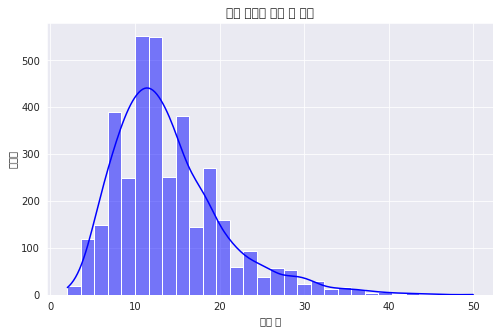

In [131]:

# 문장 수 데이터 추출
sentence_lengths = [i[0] for i in les_0]

# 시각화
sns.set_style("darkgrid")
plt.figure(figsize=(8, 5))

# 문장 수 분포를 히스토그램으로 시각화
sns.histplot(sentence_lengths, kde=True, bins=30, color='blue')

plt.title('협박 대화의 문장 수 분포')
plt.xlabel('문장 수')
plt.ylabel('빈도수')
plt.show()


/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44040 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 52712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_

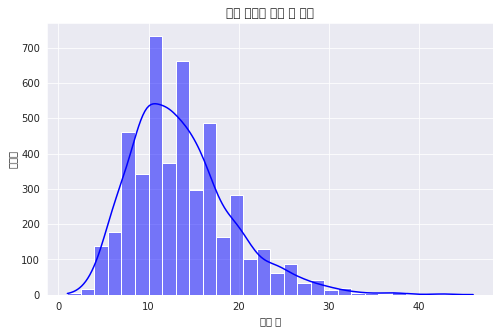

In [132]:

# 문장 수 데이터 추출
sentence_lengths = [i[0] for i in les_1]

# 시각화
sns.set_style("darkgrid")
plt.figure(figsize=(8, 5))

# 문장 수 분포를 히스토그램으로 시각화
sns.histplot(sentence_lengths, kde=True, bins=30, color='blue')

plt.title('갈취 대화의 문장 수 분포')
plt.xlabel('문장 수')
plt.ylabel('빈도수')
plt.show()


/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44340 missing from current font.
  font.set_

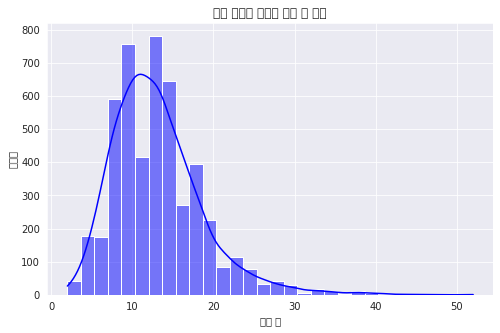

In [133]:

# 문장 수 데이터 추출
sentence_lengths = [i[0] for i in les_2]

# 시각화
sns.set_style("darkgrid")
plt.figure(figsize=(8, 5))

# 문장 수 분포를 히스토그램으로 시각화
sns.histplot(sentence_lengths, kde=True, bins=30, color='blue')

plt.title('기타 괴롭힘 대화의 문장 수 분포')
plt.xlabel('문장 수')
plt.ylabel('빈도수')
plt.show()


/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51649 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45236 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44340 missing from current font.
  font.set_

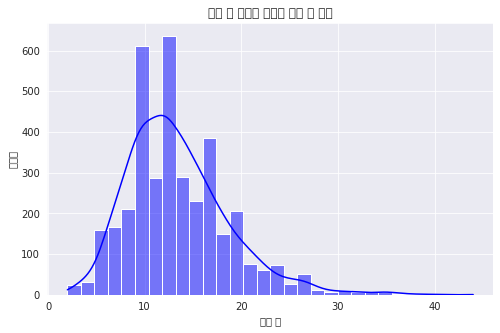

In [136]:

# 문장 수 데이터 추출
sentence_lengths = [i[0] for i in les_3]

# 시각화
sns.set_style("darkgrid")
plt.figure(figsize=(8, 5))

# 문장 수 분포를 히스토그램으로 시각화
sns.histplot(sentence_lengths, kde=True, bins=30, color='blue')

plt.title('직장 내 괴롭힘 대화의 문장 수 분포')
plt.xlabel('문장 수')
plt.ylabel('빈도수')
plt.show()


/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_

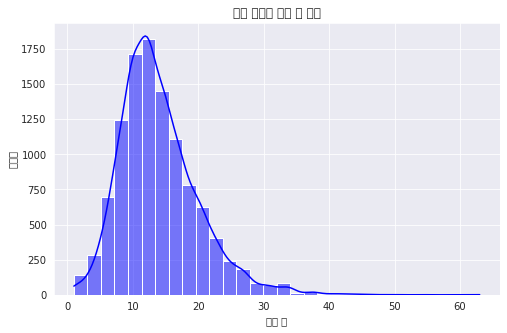

In [135]:

# 문장 수 데이터 추출
sentence_lengths = [i[0] for i in les_4]

# 시각화
sns.set_style("darkgrid")
plt.figure(figsize=(8, 5))

# 문장 수 분포를 히스토그램으로 시각화
sns.histplot(sentence_lengths, kde=True, bins=30, color='blue')

plt.title('일반 대화의 문장 수 분포')
plt.xlabel('문장 수')
plt.ylabel('빈도수')
plt.show()


In [67]:
df['conversation'][4949]

'그래도 출퇴근이라도 편하면 좋지 키키\\n 뭐... 그게 나쁜 건 아니지...\\n 회사 거리 가까우면 괜찮지.\\n 뭐가 걱정이냐 대체 키키\\n 아니... 키키 그 회사 그만둘 수도 있어 키키\\n 이렇게 갑자기? ㅋ. 그럼 일이 틀어져 버리네.\\n 헐? 키키 언제 그만두려고?\\n 아직 그냥 생각만 하고 있음 키키\\n 아니면 너 우리 가게 나와서 일해.\\n 야 키키 그래 키키 그만두고 잠시 나마 키키\\n 아 그럴까요? 키키\\n 일자리가 이렇게 생겨버리네 키키\\n 안 그래도 사람 구하려고 했어.\\n 그래 키키 우리 아빠도 사람 안 구해져서 난리였단 말이야 키키\\n 아 진짜요? 키키 말씀을 하시지 키키\\n 잠시 알바한다고 생각하고 해.\\n 그래 키키 부담 없이 키키 얼마나 좋아 키키\\n 그렇다면... 일단 주말만이라도 해볼 수 있을까요\\n 주말에 나와. ㅋ.\\n 점심 때 하면 되지.\\n 나름 인턴 기간을 두네 키키\\n 하악 키키 감사합니다 키키 사장님 키키\\n 키키. 서로 돕고 좋지 뭐.\\n 하다가 괜찮으면 계속해 키키\\n 일단은 한번 해볼게요 키키\\n 그래. 이번 주말부터 나와. 무르기 없기다.'

In [5]:
def clean_text(text):
    # Hashtag 제거
    text = re.sub('[#]+[0-9a-zA-Z_]+', '', text)
    # 쓰레기 단어 제거
    text = re.sub('[&]+[a-z]+', '', text)
    # 특수문자 제거
    text = re.sub('[^0-9a-zA-Zㄱ-ㅎ가-힣]', '', text)
    text = re.sub('[키키ㅋ]', '', text)    ##키키 ㅋ 삭제
    text = re.sub('n', ' ', text)

    return text

In [12]:
clean_text(df['conversation'][4949])

'그래도출퇴근이라도편하면좋지 뭐그게나쁜건아니지 회사거리가까우면괜찮지 뭐가걱정이냐대체 아니그회사그만둘수도있어 이렇게갑자기그럼일이틀어져버리네 헐언제그만두려고 아직그냥생각만하고있음 아니면너우리가게나와서일해 야그래그만두고잠시나마 아그럴까요 일자리가이렇게생겨버리네 안그래도사람구하려고했어 그래우리아빠도사람안구해져서난리였단말이야 아진짜요말씀을하시지 잠시알바한다고생각하고해 그래부담없이얼마나좋아 그렇다면일단주말만이라도해볼수있을까요 주말에나와 점심때하면되지 나름인턴기간을두네 하악감사합니다사장님 서로돕고좋지뭐 하다가괜찮으면계속해 일단은한번해볼게요 그래이번주말부터나와무르기없기다'

In [22]:
df['clean_conversation'] = df['conversation'].apply(clean_text)

In [53]:
df['conversation'][0]

'지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 거면 혼자 죽지 우리까지 사건에 휘말리게 해? 진짜 죽여버리고 싶게.\n 정말 잘못했습니다.\n 너가 선택해. 너가 죽을래 네 가족을 죽여줄까.\n 죄송합니다. 정말 잘못했습니다.\n 너에게는 선택권이 없어. 선택 못한다면 너와 네 가족까지 모조리 죽여버릴거야.\n 선택 못하겠습니다. 한번만 도와주세요.\n 그냥 다 죽여버려야겠군. 이의 없지?\n 제발 도와주세요.'

In [52]:
from kiwipiepy import Kiwi

# 기본 오타 교정 + 연철 오타 교정 + 장음화 오류 교정을 함께 사용
kiwi = Kiwi(typos='basic_with_continual_and_lengthening')

les = []
s = 0
for i in range(len(df)):
    sentence = df['clean_conversation'][i]
    print('sentence', sentence)
    sentence = kiwi.split_into_sents(sentence)
    print('kiwi', sentence[i])
    le = len(sentence)
    les.append([le])
    if i == 1:
        break
    
'''
[Sentence(text='지금너스스로를죽여달라고애원하는것인가', start=0, end=19, tokens=None, subs=[]), 
Sentence(text='아닙니다', start=19, end=23, tokens=None, subs=[]), 
Sentence(text='죄송합니다죽을거면혼자죽지', start=23, end=36, tokens=None, subs=[]), 
Sentence(text='우리까지사건에휘말리게해진짜죽여버리고싶게정말잘못했습니다', start=36, end=65, tokens=None, subs=[]), 
Sentence(text='너가선택해너가죽을래', start=65, end=75, tokens=None, subs=[]), 
Sentence(text='네가족을죽여줄까죄송합니다', start=75, end=88, tokens=None, subs=[]), 
Sentence(text='정말잘못했습니다너에게는선택권이없어선택못한다면너와네가족까지모조리죽여버릴거야', start=88, end=128, tokens=None, subs=[]), 
Sentence(text='선택못하겠습니다', start=128, end=136, tokens=None, subs=[]), 
Sentence(text='한번만도와주세요그냥다죽여버려야겠군', start=136, end=154, tokens=None, subs=[]), 
Sentence(text='이의없지', start=154, end=158, tokens=None, subs=[]), 
Sentence(text='제발도와주세요', start=158, end=165, tokens=None, subs=[])]
'''

sentence 지금너스스로를죽여달라고애원하는것인가아닙니다죄송합니다죽을거면혼자죽지우리까지사건에휘말리게해진짜죽여버리고싶게정말잘못했습니다너가선택해너가죽을래네가족을죽여줄까죄송합니다정말잘못했습니다너에게는선택권이없어선택못한다면너와네가족까지모조리죽여버릴거야선택못하겠습니다한번만도와주세요그냥다죽여버려야겠군이의없지제발도와주세요
kiwi Sentence(text='지금너스스로를죽여달라고애원하는것인가', start=0, end=19, tokens=None, subs=[])
sentence 길동경찰서입니다9시40분마트에폭발물을설치할거다네똑바로들어한번만더얘기한다장난전화걸지마시죠9시40분마트에폭발물이터지면다죽는거야장난전화는업무방해죄에해당됩니다판단은너에게달려있다길동경찰서에도폭발물터지면꽤나재미있겠지선생님진정하세요난이야기했어경고했다는말이야
kiwi Sentence(text='9시40분마트에폭발물을설치할거다네똑바로들어한번만더얘기한다장난전화걸지마시죠9시40분마트에폭발물이터지면다죽는거야장난전화는업무방해죄에해당됩니다', start=8, end=84, tokens=None, subs=[])


"\n[Sentence(text='지금너스스로를죽여달라고애원하는것인가', start=0, end=19, tokens=None, subs=[]), \nSentence(text='아닙니다', start=19, end=23, tokens=None, subs=[]), \nSentence(text='죄송합니다죽을거면혼자죽지', start=23, end=36, tokens=None, subs=[]), \nSentence(text='우리까지사건에휘말리게해진짜죽여버리고싶게정말잘못했습니다', start=36, end=65, tokens=None, subs=[]), \nSentence(text='너가선택해너가죽을래', start=65, end=75, tokens=None, subs=[]), \nSentence(text='네가족을죽여줄까죄송합니다', start=75, end=88, tokens=None, subs=[]), \nSentence(text='정말잘못했습니다너에게는선택권이없어선택못한다면너와네가족까지모조리죽여버릴거야', start=88, end=128, tokens=None, subs=[]), \nSentence(text='선택못하겠습니다', start=128, end=136, tokens=None, subs=[]), \nSentence(text='한번만도와주세요그냥다죽여버려야겠군', start=136, end=154, tokens=None, subs=[]), \nSentence(text='이의없지', start=154, end=158, tokens=None, subs=[]), \nSentence(text='제발도와주세요', start=158, end=165, tokens=None, subs=[])]\n"

In [49]:
[[len, sentence]]

[11, 6, 10, 6, 17, 12, 8, 9, 8, 8, 7]

In [37]:
text[0][0]

'길동경찰서입니다'

In [38]:
text[1][0]

'9시40분마트에폭발물을설치할거다네똑바로들어한번만더얘기한다장난전화걸지마시죠9시40분마트에폭발물이터지면다죽는거야장난전화는업무방해죄에해당됩니다'

In [39]:
text[2][0]

'판단은너에게달려있다'

In [ ]:
# 문장 길이 조정

In [ ]:
# 토큰화 전 텍스트 길이 확인
tokenized = tokenizer(
    train_df['conversation'].tolist(),
    truncation=False,
    padding=False,
    return_length=True
)

lengths = tokenized['length']
print(f"최대 시퀀스 길이: {max(lengths)}")
print(f"평균 시퀀스 길이: {sum(lengths)/len(lengths)}")

In [71]:
from kiwipiepy.utils import Stopwords

stopwords = Stopwords()

text = kiwi.tokenize(text[2][0])
text

[Token(form='회사', tag='NNG', start=0, len=2),
 Token(form='거리', tag='NNB', start=2, len=2),
 Token(form='가깝', tag='VA-I', start=4, len=3),
 Token(form='으면', tag='EC', start=6, len=2),
 Token(form='괜찮', tag='VA', start=8, len=2),
 Token(form='뭐', tag='NP', start=12, len=1),
 Token(form='걱정', tag='NNG', start=14, len=2),
 Token(form='냐', tag='EC', start=17, len=1),
 Token(form='대체', tag='MAG', start=18, len=2),
 Token(form='키키', tag='NNP', start=20, len=2),
 Token(form='아니', tag='IC', start=23, len=2),
 Token(form='키키', tag='NNP', start=25, len=2),
 Token(form='회사', tag='NNG', start=28, len=2),
 Token(form='그만두', tag='VV', start=30, len=3),
 Token(form='있', tag='VA', start=35, len=1),
 Token(form='키키', tag='NNP', start=37, len=2),
 Token(form='이렇게', tag='MAG', start=40, len=3),
 Token(form='갑자기', tag='MAG', start=43, len=3),
 Token(form='그럼', tag='MAJ', start=47, len=2),
 Token(form='틀어지', tag='VV', start=51, len=3),
 Token(form='버리', tag='VX', start=54, len=2),
 Token(form='네', tag='EF'

In [50]:
aa = []
for i in text:
    if i[0] != 1: # 길이 기준이라 음...
    if i[0] == # 품사 기준 => 무슨 기준?
        print(i[0])
        aa.append(i[0])

aa


그래도
출퇴근
라도
편하


['그래도', '출퇴근', '라도', '편하']

In [ ]:
# 토크나이저 -> 불용어 제거 

In [51]:
aaa = ' '.join(aa)
aaa

'그래도 출퇴근 라도 편하'

In [26]:
from wordcloud import WordCloud

filtered_data = data[data['class'] == 4]
text = ' '.join(filtered_data['token'].apply(lambda x: ' '.join(x)))

font_path = './MaruBuri-SemiBold.ttf'
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(text)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Empty DataFrame
Columns: [idx, class, conversation]
Index: []


ValueError: We need at least 1 word to plot a word cloud, got 0.

In [ ]:
# 띄어쓰기
!pip3 install git+https://github.com/haven-jeon/PyKoSpacing.git

from pykospacing import Spacing
spacing = Spacing()

print('원본 :',data['conversation'][4])
print('띄어쓰기 :',spacing(data['conversation'][4]))

tokenizer 후에 적용

In [14]:
from wordcloud import WordCloud

# 비정상 데이터
filtered_data = data[data['class'] != 4]
text = ' '.join(filtered_data['tokens'].apply(lambda x: ' '.join(x)))

font_path = './MaruBuri-SemiBold.ttf'
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(text)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

TypeError: expected string or bytes-like object

In [ ]:
from transformers import ElectraTokenizer

# KoELECTRA 토크나이저 로드
tokenizer = ElectraTokenizer.from_pretrained("monologg/koelectra-base-v3-discriminator")

def get_token_length(text):
    tokens = tokenizer.tokenize(text)
    return tokens, len(tokens)

data['tokens'], data['tokens_len'] = zip(*data['conversation'].apply(get_token_length))
data.head()

In [7]:
classes = label_map.values()
num_classes = len(classes)

plt.figure(figsize = (20, 5))
for i, cls in enumerate(classes):
    plt.subplot(1, num_classes, i + 1)
    plt.hist(data[data['class'] == cls]['tokens_len'], bins = 20, alpha = 0.7)
    plt.title(f'Class {cls}')
    plt.xlabel('Tokens Length')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

NameError: name 'label_map' is not defined

In [6]:

# 토큰화 전 텍스트 길이 확인
tokenized = tokenizer(
    data['conversation'].tolist(),
    truncation=False,
    padding=False,
    return_length=True
)

lengths = tokenized['length']
print(f"최대 시퀀스 길이: {max(lengths)}")
print(f"평균 시퀀스 길이: {sum(lengths)/len(lengths)}")


NameError: name 'tokenizer' is not defined